# Argumentation
Nessa implementação usaremos a tecnica de **argumentation**, que consiste na **geraçao de novas imagens** a partir de nosso banco de dados original. Podemos fazer rotaçoes, zoons, mudar escalas de cores, espelhamentos etc.
Dessa forma, os dados que temos podem aumentar consideravelmente, podendo assim, aumentar tambem a precisao dos resultados de nossa REDE NEURAL

# Importações

Prestar atenção que o KERAS foi incorporado no TensorFLow 2.0, dessa madeira a importaçao dos modulos keras deve ser feita como tensorflow.keras

In [3]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D 
from tensorflow.python.keras.utils import np_utils 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt

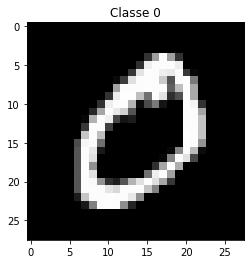

In [4]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data() #Fazemos a importaçao do MNIST
plt.imshow(X_treinamento[1], cmap = 'gray') #abrimos como exemplo o treinamento [1], e colocacamos e  escala preto e branco
plt.title('Classe ' + str(y_treinamento[1])) #Titulo

previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1) #Fazemos o reshape para que o TF consiga ler os dados
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32') #Mudamos para float para podermos dividir logo abaixo
previsores_teste = previsores_teste.astype('float32')

previsores_treinamento /= 255 #Normalizaçao (1) Pra diminuir o custo operacional, dividimos os valores RGB por 255, 
                              #dessa forma temos uma escala de 0 ate 1
previsores_teste /= 255

classe_treinamento = np_utils.to_categorical(y_treinamento, 10) #Transformamos os dados em variaveis dummy
classe_teste = np_utils.to_categorical(y_teste, 10)

In [5]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

# Implementando o DataGenerator
https://keras.io/api/preprocessing/image/
    fit_generator: é o metodo responsavel por treinar e gerar as nossas imagens
        1- steps_per_epochs: Numero de etapas de amostras que serao analisadas antes de passar a epoca.
        Se colocar 60000 ela pegara todos os registros e aplicara as tecnicas que passamos em ImageDataGenerator.
        A documentaçao recomenda dividir pelo numero de neuroneos da primeira camada densa.

In [8]:
gerador_treinamento = ImageDataGenerator(rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2) 
                                        #  Os argumentos aqui mostram qual as tecnicas que queremos aplicar as imagens
gerador_teste = ImageDataGenerator() # Nesse exemplo na nossa base de teste nao precisamos gerar nada

base_treinamento = gerador_treinamento.flow(previsores_treinamento,
                                            classe_treinamento, batch_size = 128)
base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size = 128)

classificador.fit_generator(base_treinamento, steps_per_epoch = 600000 / 128,
                            epochs = 5, validation_data = base_teste,
                            validation_steps = 10000 / 128)

Epoch 1/5
4688/4687 [==============================] - 280s 60ms/step - loss: 0.1270 - accuracy: 0.9608 - val_loss: 0.0542 - val_accuracy: 0.9809
Epoch 2/5
1029/4687 [=====>........................] - ETA: 3:57 - loss: 0.0712 - accuracy: 0.9780

KeyboardInterrupt: 